# 서울시 범죄현황 데이터를 통한 CCTV 설치 필요지역 파악하기

## 1. 서울시 자치구별 범죄현황 데이터 읽어오기

In [7]:
import pandas as pd

# Colab에서는 파일의경로명을 해당 파일에서 점 세개 버튼의 경로 복사로 복사해 사용
#예) Crime_Seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_2주차_실습파일_오프라인/서울시 5대 범죄 발생 현황 통계.txt'.......)

# 강의자료 3, 7쪽 참조, 여기서 불러오로 파일은 encodind = 'utf-8' 또는 생략해도 됨
#('./서울시 5대 범죄 발생 현황 통계.txt', sep= '\t', encoding= 'utf-8')
Crime_Seoul = pd.read_csv('./경찰청 경기도남부경찰청_5대범죄 발생검거 건수_20221231.csv',encoding='cp949')
Crime_Seoul


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,도경찰청,0,1,0,1,0,382,0,2,0,117
1,수원중부,6,6,5,4,144,121,1416,950,1635,1448
2,수원남부,6,7,3,4,255,232,1879,1091,2806,2343
3,수원서부,2,2,0,0,177,140,1408,934,1897,1546
4,안양동안,2,2,0,0,101,97,742,437,1031,881
5,안양만안,3,3,3,3,88,80,849,630,1243,1081
6,군포,2,2,0,0,86,79,751,553,1056,911
7,성남수정,2,1,6,6,108,99,1134,812,1443,1228
8,성남중원,1,1,3,2,123,112,876,428,1345,1159
9,분당,8,6,4,4,137,126,1042,699,1435,1242


## 2. 데이터 살펴보기

### 2-1. 행x열 수, 열이름, 인덱스를 살펴보자

In [9]:
print(Crime_Seoul.shape)
print(Crime_Seoul.index)
print(Crime_Seoul.columns)

(32, 11)
RangeIndex(start=0, stop=32, step=1)
Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 강제추행 발생', '강간 강제추행 검거',
       '절도 발생', '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')


### 2-2. 데이터의 상위 5행과 하위 5행을 살펴보자

In [11]:
Crime_Seoul.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,도경찰청,0,1,0,1,0,382,0,2,0,117
1,수원중부,6,6,5,4,144,121,1416,950,1635,1448
2,수원남부,6,7,3,4,255,232,1879,1091,2806,2343
3,수원서부,2,2,0,0,177,140,1408,934,1897,1546
4,안양동안,2,2,0,0,101,97,742,437,1031,881


In [13]:
Crime_Seoul.tail()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
27,의왕,2,2,2,2,26,19,219,136,342,301
28,이천,5,5,0,0,85,74,739,411,1245,1061
29,안성,5,5,6,6,91,69,629,371,1152,957
30,여주,3,2,1,1,43,34,310,185,549,468
31,양평,2,2,3,3,50,5,279,152,544,462


### 2-3. 데이터의 타입, 아이템수, 누락데이터 수 등을 살펴보자

In [15]:
Crime_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   관서명         32 non-null     object
 1   살인 발생       32 non-null     int64 
 2   살인 검거       32 non-null     int64 
 3   강도 발생       32 non-null     int64 
 4   강도 검거       32 non-null     int64 
 5   강간 강제추행 발생  32 non-null     int64 
 6   강간 강제추행 검거  32 non-null     int64 
 7   절도 발생       32 non-null     int64 
 8   절도 검거       32 non-null     int64 
 9   폭력 발생       32 non-null     int64 
 10  폭력 검거       32 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.9+ KB


## 3. CCTV 데이터 정리하기

### 3.1 데이터의 컬럼 이름을 변경해보자

In [21]:
#데이터의 열이름 변경: 
#'자치구' -> '구별',
#'합계' -> '발생합계', '합계.1' -> '검거합계',
#'살인.1'-> '살인검거',
#'강도.1' -> '강도검거',
#'강간강제추행.1' -> '강간강제추행검거',
#'절도.1' -> '절도검거',
#'폭력.1' -> '폭력검거'
Crime_Seoul.rename(columns={'자치구':'구별','합계':'발생합계','합계.1':'검거합계','살인.1':'살인검거','강도.1':'강도검거','강간강제추행.1':'강간강제추행검거','절도.1':'절도검거','폭력.1':'폭력검거'},inplace=True)
Crime_Seoul.head()

,기간,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


### 3.2 불필요한 행과 열을 삭제하자

In [23]:
#'기간'열 삭제 (columns='기간', axis=1, inplace=True)
Crime_Seoul.drop(columns='기간', axis=1, inplace=True)
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
0,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


In [25]:
#0,1행 삭제 (index=[0,1], axis=0, inplace=True)
Crime_Seoul.drop(index=[0,1], axis=0, inplace=True)
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
5,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
6,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [31]:
#기존 인덱스를 버리고 인덱스 0부터 다시 설정 (drop=True, inplace=True)  
Crime_Seoul.reset_index(drop=True, inplace=True)
Crime_Seoul.head()


,구별,발생합계,검거합계,살인,살인검거,강도,강도검거,강간강제추행,강간강제추행검거,절도,절도검거,폭력,폭력검거
0,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
1,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
2,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
3,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
4,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


## 4. 범죄현황 데이터 자세히 보기

### 4-1. 범죄발생이 가장 많은/적은 상위 5개 구는 어디일까?

In [21]:
#'범죄발생'이 가장 많은 구, 데이터 '발생합계'열을 기준으로 내림차순 정렬하기

Crime_Seoul.sort_values(by='살인 발생',ascending=False).head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
21,용인동부,9,9,0,0,201,179,1866,1363,2327,1957
15,안산상록,9,9,1,1,132,118,1220,602,1985,1705
9,분당,8,6,4,4,137,126,1042,699,1435,1242
17,평택,8,9,6,6,255,217,2341,1258,3684,3038
16,시흥,8,8,8,8,207,161,1854,938,2849,2301


In [23]:
#범죄발생이 가장 적은 구, 데이터 '발생합계'열을 기준으로 오름차순 정렬하기

Crime_Seoul.sort_values(by='살인 발생',ascending=True).head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,도경찰청,0,1,0,1,0,382,0,2,0,117
26,과천,0,0,0,0,14,11,213,115,173,149
10,부천소사,1,1,4,4,67,58,848,582,1093,935
8,성남중원,1,1,3,2,123,112,876,428,1345,1159
27,의왕,2,2,2,2,26,19,219,136,342,301


### 4-2 각 범죄별 검거율을 계산하여 검거율 열을 추가하자

In [29]:
# 각 컬럼의 데이터 타입을 확인
# 검거율을 계산하기 위해서는 데이터가 정수형이거나 실수형이여야 함
# 이 정수형이 아니라 문자열 형임을 알수 있다. 문자열 형은 수학연산이 불가
Crime_Seoul.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   관서명         32 non-null     object
 1   살인 발생       32 non-null     int64 
 2   살인 검거       32 non-null     int64 
 3   강도 발생       32 non-null     int64 
 4   강도 검거       32 non-null     int64 
 5   강간 강제추행 발생  32 non-null     int64 
 6   강간 강제추행 검거  32 non-null     int64 
 7   절도 발생       32 non-null     int64 
 8   절도 검거       32 non-null     int64 
 9   폭력 발생       32 non-null     int64 
 10  폭력 검거       32 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.9+ KB


In [39]:
#각 열의 문자열 형의 데이터를 정수형으로 변경
Crime_Seoul = Crime_Seoul.astype({'살인 발생':'int64', '살인 검거':'int64',
                                  '강도 발생':'int64', '강도 검거':'int64',
                                  '강간 강제추행 발생':'int64', '강간 강제추행 검거':'int64',
                                  '절도 발생':'int64', '절도 검거':'int64',
                                  '폭력 발생':'int64', '폭력 검거':'int64'})
Crime_Seoul.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,도경찰청,0,1,0,1,0,382,0,2,0,117
1,수원중부,6,6,5,4,144,121,1416,950,1635,1448
2,수원남부,6,7,3,4,255,232,1879,1091,2806,2343
3,수원서부,2,2,0,0,177,140,1408,934,1897,1546
4,안양동안,2,2,0,0,101,97,742,437,1031,881


In [43]:
# 각 컬럼의 데이터 타입이 정수형으로 변경되었음 확인

Crime_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   관서명         32 non-null     object
 1   살인 발생       32 non-null     int64 
 2   살인 검거       32 non-null     int64 
 3   강도 발생       32 non-null     int64 
 4   강도 검거       32 non-null     int64 
 5   강간 강제추행 발생  32 non-null     int64 
 6   강간 강제추행 검거  32 non-null     int64 
 7   절도 발생       32 non-null     int64 
 8   절도 검거       32 non-null     int64 
 9   폭력 발생       32 non-null     int64 
 10  폭력 검거       32 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.9+ KB


In [63]:
#검거 수/발생 수 * 100
#예시) Crime_Seoul['검거율'] = Crime_Seoul['검거합계']/ Crime_Seoul['발생합계']  * 100
#예시) Crime_Seoul['살인검거율'] = Crime_Seoul['살인검거']/ Crime_Seoul['살인']  * 100

Crime_Seoul['발생합계'] = Crime_Seoul['살인 발생']+Crime_Seoul['강도 발생']+Crime_Seoul['강간 강제추행 발생']+Crime_Seoul['절도 발생']+Crime_Seoul['폭력 발생'] 
Crime_Seoul['검거합계'] = Crime_Seoul['살인 검거']+Crime_Seoul['강도 검거']+Crime_Seoul['강간 강제추행 검거']+Crime_Seoul['절도 검거']+Crime_Seoul['폭력 검거']
Crime_Seoul['검거율'] = Crime_Seoul['검거합계']/ Crime_Seoul['발생합계']  * 100
                    
Crime_Seoul.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,CCTV수,인구수,발생합계,검거합계,검거율
관서명,,,,,,,,,,,,,,,
도경찰청,0,1,0,1,0,382,0,2,0,117,1729.0,151290.0,0,503,inf
수원중부,6,6,5,4,144,121,1416,950,1635,1448,2001.0,126171.0,3206,2529,78.883344
수원남부,6,7,3,4,255,232,1879,1091,2806,2343,2383.0,228670.0,4949,3677,74.297838
수원서부,2,2,0,0,177,140,1408,934,1897,1546,3515.0,300889.0,3484,2622,75.258324
안양동안,2,2,0,0,101,97,742,437,1031,881,2556.0,351350.0,1876,1417,75.533049


### 4-3. 각 범죄의 검거수를 삭제하자.

In [45]:
#각 범죄의 검거 열은 삭제, 검거수는 검거율로 대체해 사용 
#(columns=['살인검거','강도검거','강간강제추행검거','절도검거', '폭력검거'], axis=1, inplace=True)

Crime_Seoul.drop(columns=['살인검거','강도검거','강간강제추행검거','절도검거', '폭력검거'], axis=1, inplace=True)
Crime_Seoul.head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,3846,4117,4,7,238,1515,2082,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310
3,성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990
4,광진구,4011,2816,4,6,273,1875,1853,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967


### 4-4. 범죄의 검거율이 가장 높은/낮은 상위 5개구는 어디일까?

In [51]:
#범죄 검거율이 가장 높은 구, 데이터 '검거율'열을 기준으로 정렬하기

Crime_Seoul.sort_values(by='검거율',ascending=False).head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
0,종로구,3846,4117,4,7,238,1515,2082,107.046282,125.0,114.285714,480.252101,70.561056,90.874159
7,성북구,2877,2323,3,3,176,1082,1613,80.743830,100.0,100.000000,73.863636,67.560074,90.266584
2,용산구,3313,2611,3,3,272,999,2036,78.810746,100.0,133.333333,87.132353,54.454454,89.538310
8,강북구,3838,3023,6,3,176,1229,2424,78.764982,100.0,66.666667,82.386364,54.027665,91.006601
11,은평구,3880,3000,3,1,194,1565,2117,77.319588,100.0,100.000000,83.505155,62.428115,87.718470


In [53]:
#범죄 검거율이 가장 낮은 구, 데이터 '검거율'열을 기준으로 정렬하기

Crime_Seoul.sort_values(by='검거율',ascending=True).head()

,구별,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율
19,동작구,3400,2195,4,1,251,1328,1816,64.558824,50.0,100.000000,43.824701,43.599398,82.764317
1,중구,4327,2804,2,6,195,2202,1922,64.802404,50.0,83.333333,58.974359,47.683924,84.963580
18,영등포구,5820,3787,10,3,356,2409,3042,65.068729,100.0,100.000000,67.134831,44.333748,81.097962
13,마포구,4842,3170,2,2,495,2190,2153,65.468815,100.0,100.000000,84.242424,41.872146,85.090571
14,양천구,3214,2124,6,2,127,1477,1602,66.085874,100.0,100.000000,88.188976,42.924848,85.518102


## 5. 인구수와 CCTV수 데이터와 범죄 현황 데이터 합치기

### 5-1 인구수와 CCTV 수 데이터 가져오기

In [45]:
# 서울시 자치구별 CCTV 현황 분석에서 정리하여 저장했던 'CCTV_pop.xlsx' 액셀 파일 열기

CCTV_pop = pd.read_excel('./CCTV_pop.xlsx')
CCTV_pop.head()

,구별,총계,2017년,2018년,2019년,2017년 이전,최근증가율,인구수,남성,여성,여성비율,남성비율
0,종로구,1729,259,85,9,1376,25.654070,151290,73746,77544,51.255205,48.744795
1,중구,2001,462,228,194,1117,79.140555,126171,61910,64261,50.931672,49.068328
2,용산구,2383,351,125,307,1600,48.937500,228670,110356,118314,51.740062,48.259938
3,성동구,3515,790,409,262,2054,71.129503,300889,147273,153616,51.054043,48.945957
4,광진구,2556,675,465,712,704,263.068182,351350,170262,181088,51.540629,48.459371


In [53]:
# CCTV_pop 데이터에서 '총계','인구수' 열만 가져와서 추가하기 
Crime_Seoul['CCTV수']=CCTV_pop['총계']
Crime_Seoul['인구수']=CCTV_pop['인구수']
Crime_Seoul.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,CCTV수,인구수
0,도경찰청,0,1,0,1,0,382,0,2,0,117,1729.0,151290.0
1,수원중부,6,6,5,4,144,121,1416,950,1635,1448,2001.0,126171.0
2,수원남부,6,7,3,4,255,232,1879,1091,2806,2343,2383.0,228670.0
3,수원서부,2,2,0,0,177,140,1408,934,1897,1546,3515.0,300889.0
4,안양동안,2,2,0,0,101,97,742,437,1031,881,2556.0,351350.0


In [55]:
#구별로 인덱스 설정
Crime_Seoul.set_index('관서명', inplace=True)
Crime_Seoul.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 강제추행 발생,강간 강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,CCTV수,인구수
관서명,,,,,,,,,,,,
도경찰청,0,1,0,1,0,382,0,2,0,117,1729.0,151290.0
수원중부,6,6,5,4,144,121,1416,950,1635,1448,2001.0,126171.0
수원남부,6,7,3,4,255,232,1879,1091,2806,2343,2383.0,228670.0
수원서부,2,2,0,0,177,140,1408,934,1897,1546,3515.0,300889.0
안양동안,2,2,0,0,101,97,742,437,1031,881,2556.0,351350.0


## 5. 범죄 데이터 시각화 하기

In [59]:
#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import platform
path = "c:/windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~~~')    

'''
#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행
적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행
그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행

#한글 폰트 깨짐 방지 코드
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
'''

"\n#코랩일 경우 위의 코드는 주석처리 아래의 코드로 실행\n적용이 안되면 상단 런타임 메뉴에서 다시시작 및 모두실행으로 실행\n그래도 안되면 런타임 메뉴에서 런타임 다시시작 -> 다시시작 및 모두실행\n\n#한글 폰트 깨짐 방지 코드\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nimport matplotlib as mpl \nimport matplotlib.pyplot as plt \nimport matplotlib.font_manager as fm  \n\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n\npath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' \nfont_name = fm.FontProperties(fname=path, size=10).get_name()\nprint(font_name)\nplt.rc('font', family=font_name)\n\nfm._rebuild()\nmpl.rcParams['axes.unicode_minus'] = False\n"

### 5.1 범죄 발생수가 가장 많은 구는 어디인가?

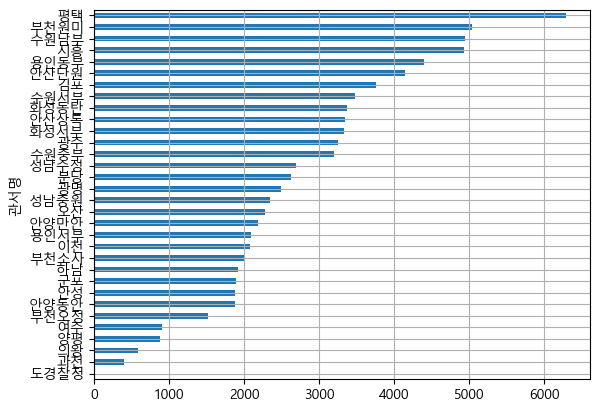

In [69]:
#막대 그래프 그리기
# '발생합계로 소팅하여 막대 그래프 그리기
Crime_Seoul['발생합계'].sort_values().plot(kind='barh', grid=True)
plt.show()

### 5.2 범죄 검거율이 가장 높은 구는 어디인가?

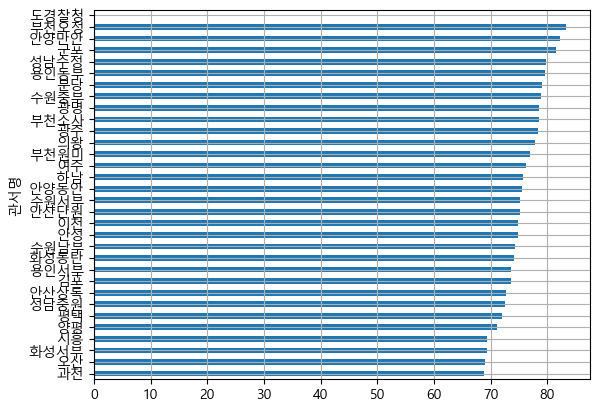

In [71]:
#막대 그래프 그리기
# '검거율'로 소팅하여 막대 그래프 그리기
Crime_Seoul['검거율'].sort_values().plot(kind='barh', grid=True)
plt.show()

### 5.3 CCTV수가 가장 많은 구는 어디일까?

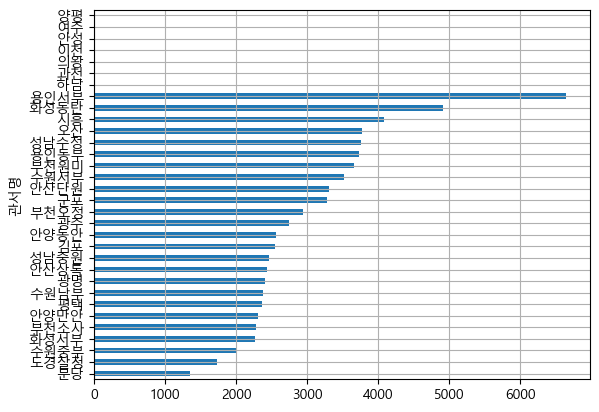

In [73]:
#막대 그래프 그리기
# 'CCTV수'로 소팅하여 막대 그래프 그리기
Crime_Seoul['CCTV수'].sort_values().plot(kind='barh', grid=True)
plt.show()

### 5.4 강도, 살인, 폭력은 어떤 관계에 있을까?

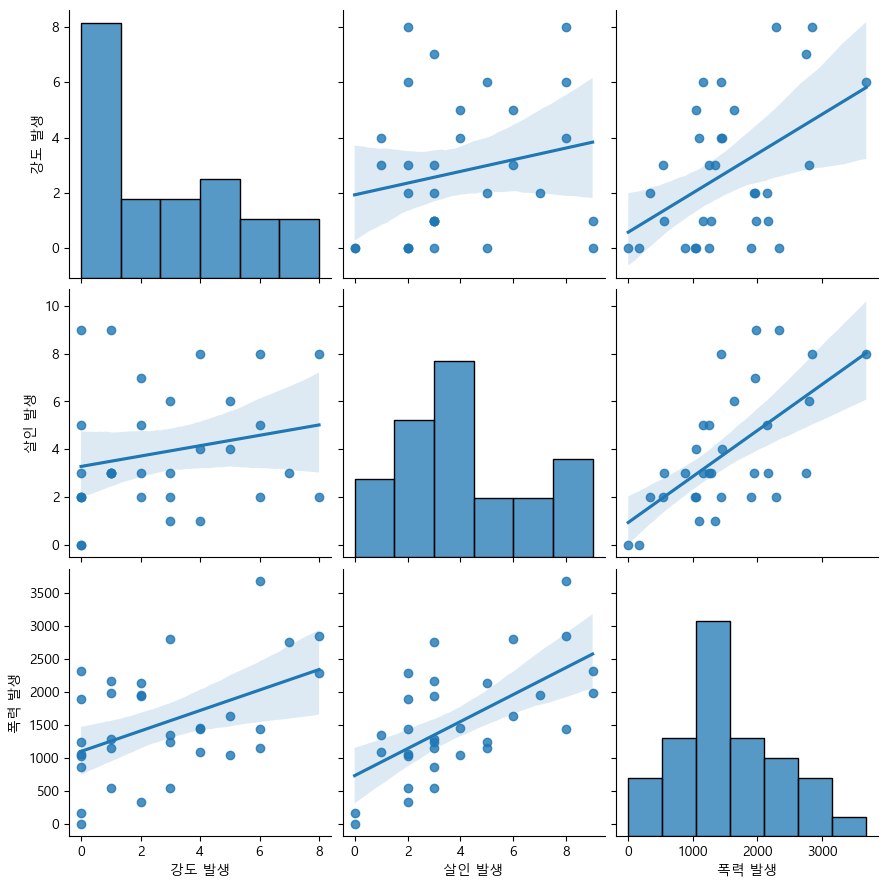

In [75]:
#강도, 살인, 폭력에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, vars=['강도 발생','살인 발생','폭력 발생'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

### 5.5 살인, 강도와 인구수와 CCTV수와 어떤 관계에 있을까?

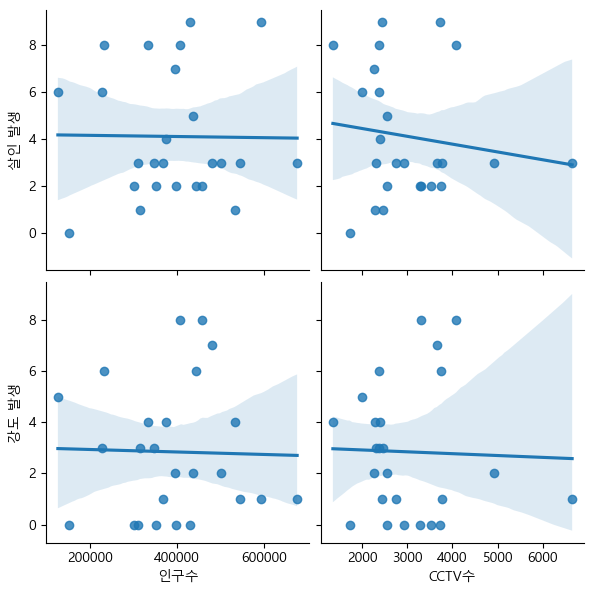

In [77]:
#살인, 강도, 인구수, CCTV수에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, x_vars=['인구수','CCTV수'], y_vars=['살인 발생','강도 발생'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

### 5.6 인구수와 CCTV수는 살인검거율과 폭력검거율과 어떤 관계에 있을까?

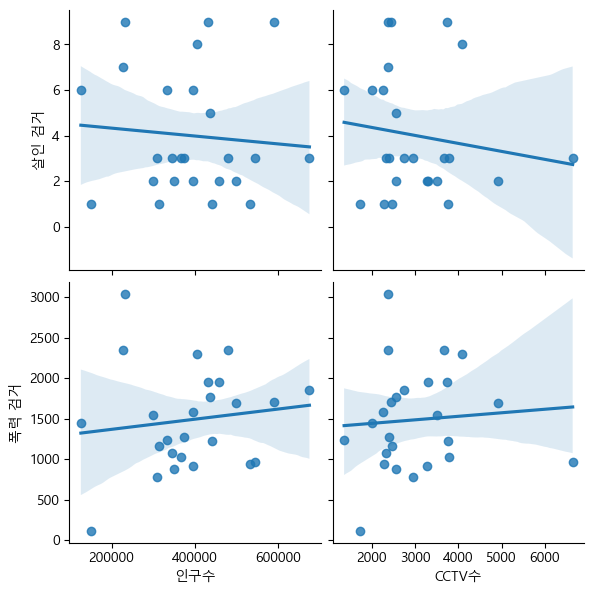

In [81]:
#살인, 강도, 인구수, CCTV수에 대한 상간관계 그래프 
#pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램 또는 분포도를 그려주는 함수
sns.pairplot(Crime_Seoul, x_vars=['인구수','CCTV수'], y_vars=['살인 검거','폭력 검거'], kind='reg', height=3) #kind='reg'는 차트 종류를 산점도라는 의미
plt.show()

In [77]:
Crime_Seoul.head()

,발생합계,검거합계,살인,강도,강간강제추행,절도,폭력,검거율,살인검거율,강도검거율,강간강제추행검거율,절도검거율,폭력검거율,CCTV수,인구수
구별,,,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,107.046282,125.000000,114.285714,480.252101,70.561056,90.874159,1729,151290
중구,4327,2804,2,6,195,2202,1922,64.802404,50.000000,83.333333,58.974359,47.683924,84.963580,2001,126171
용산구,3313,2611,3,3,272,999,2036,78.810746,100.000000,133.333333,87.132353,54.454454,89.538310,2383,228670
성동구,2512,1838,6,9,133,970,1394,73.168790,83.333333,111.111111,72.180451,52.680412,87.230990,3515,300889
광진구,4011,2816,4,6,273,1875,1853,70.206931,125.000000,83.333333,78.021978,53.760000,85.536967,2556,351350


In [79]:
#범죄발생수, 검거율, CCTV수, 인구수 항목만 따로 가져오기 
df = Crime_Seoul[['발생합계','검거율','CCTV수','인구수']]
df.head()
#항목별 상관관계 살펴보기, 대각선을 중심으로 대칭, 음수는 두 데이터가 음의 상관관게, 양수는 양의 상간관계,
#절대값이 1에 가까울 수록 상관도가 높음
df.corr()

,발생합계,검거율,CCTV수,인구수
발생합계,1.000000,-0.257863,0.606156,0.490203
검거율,-0.257863,1.000000,-0.215796,-0.374106
CCTV수,0.606156,-0.215796,1.000000,0.441639
인구수,0.490203,-0.374106,0.441639,1.000000


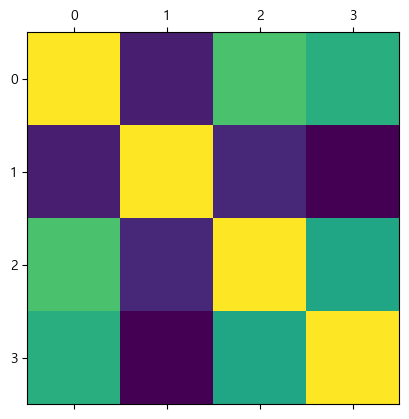

In [81]:
#상관관계 그래프로 보기, 양의 상관관계는 녹색계열, 음의 상관관계는 보라색 계열
plt.matshow(df.corr())

## 6. 위의 분석 결과를 보고 CCTV수가 범죄발생 및 검거에 미치는 영향과 CCTV 설치에 대한 자신의 생각을 아래에 정리해 보자

In [ ]:
대체로 CCTV수가 많으면 범죄검거율이 감소하고 CCTV수가 많은 지역엔 범죄검거율이 증가한다 